# NLP Sentiment Analysis

Import required packages

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sci-Kit Learn
from sklearn.model_selection import train_test_split

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.classify import  SklearnClassifier

# Data Vis
from wordcloud import WordCloud, STOPWORDS
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data Prep

Load data set and keep only relevant data:
- text
- sentiment

In [12]:
data = pd.read_csv('data/Sentiment.csv')
data = data[['text', 'sentiment']]


Split data into test and train data set. The test data set is 10%.


In [13]:
train, test = train_test_split(data, test_size=0.1)

Separate positive, neutral and negative into different data frame.

In [14]:
train_pos = train[train['sentiment'] == 'Positive']
train_pos = train_pos['text']

train_neutral = train[train['sentiment'] == 'Neutral']
train_neutral = train_neutral['text']

train_neg = train[train['sentiment'] == 'Negative']
train_neg = train_neg['text']


Clean the text from hashtags, mentions and links. Draw wordcloud.


Positive


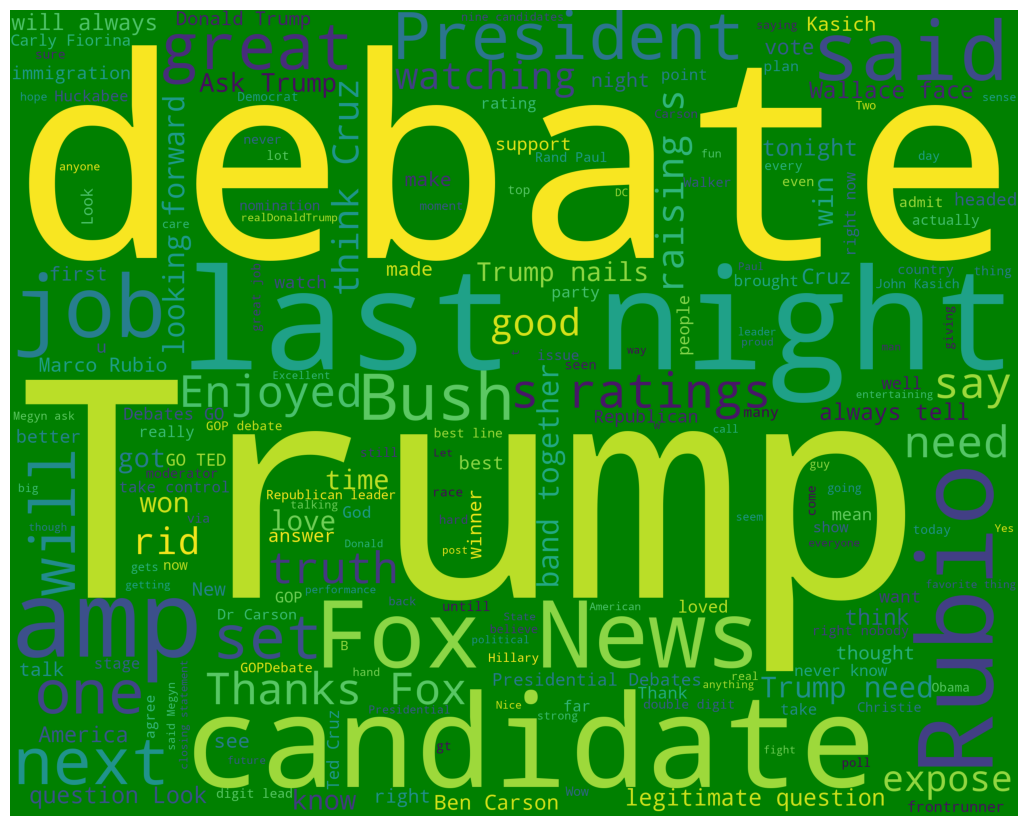

Neutral


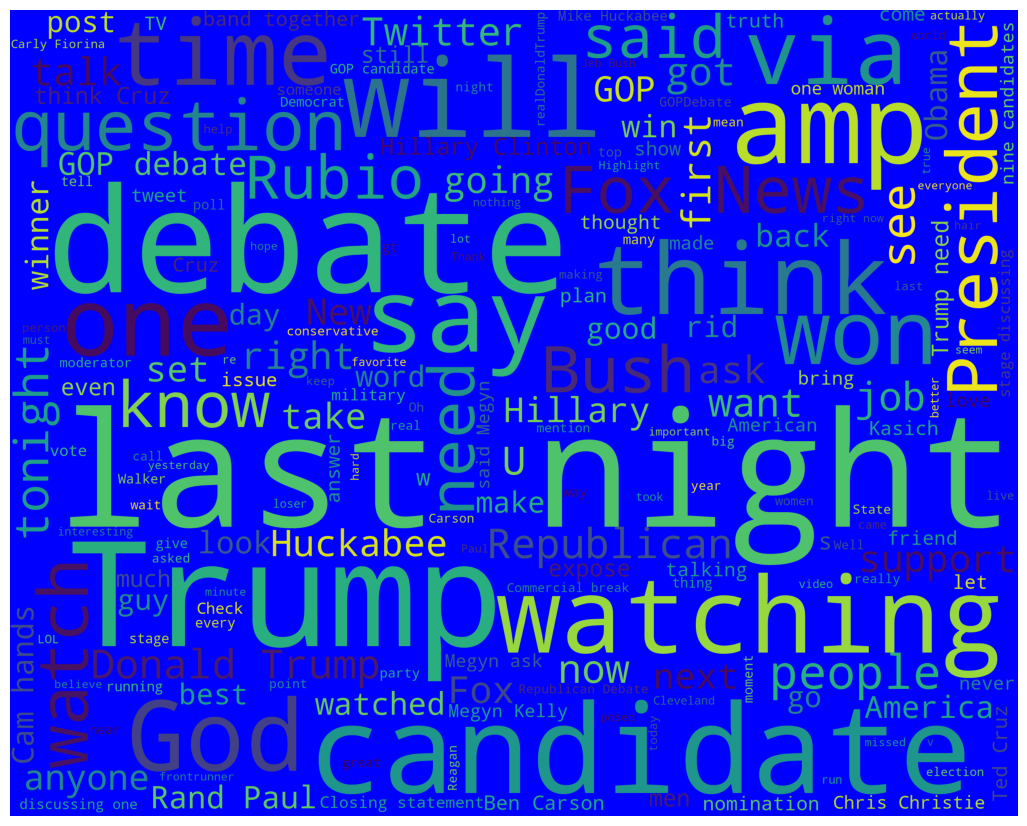

Negative


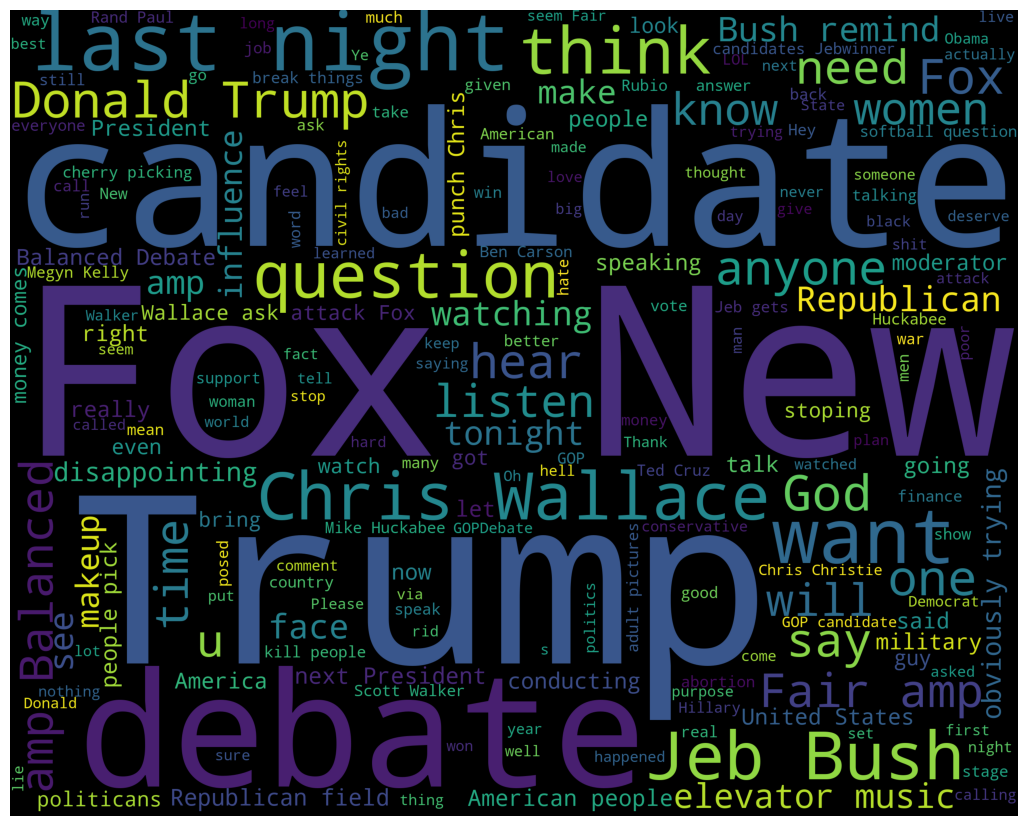

In [15]:
def wordcloud_draw(data, colour = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                             if 'http' not in word
                             and not word.startswith("@")
                             and not word.startswith("#")
                             and word != 'RT'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=colour,
                          width=2500,
                          height=2000).generate(cleaned_word)
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("Positive")
wordcloud_draw(train_pos, "green")
print("Neutral")
wordcloud_draw(train_neutral, "blue")
print("Negative")
wordcloud_draw(train_neg, "black")


Then, remove the hashtags, mentions, links and stopwords from the training set.

In [18]:
tweets = []
nltk.download("stopwords")
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]

    words_cleaned = [word for word in words_filtered
                     if 'http' not in word
                     and not word.startswith("@")
                     and not word.startswith("#")
                     and word != "RT"]
    words_without_stopwords = words_cleaned = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))


test_pos = test[test["sentiment"] == "Positive"]["text"]
test_neutral = test[test["sentiment"] == "Neutral"]["text"]
test_neg = test[test["sentiment"] == "Negative"]["text"]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harrywatson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Feature Selection

Then extract features with nltk lib. Firstly measure the frequency distribution

In [19]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

Plot the most frequent words

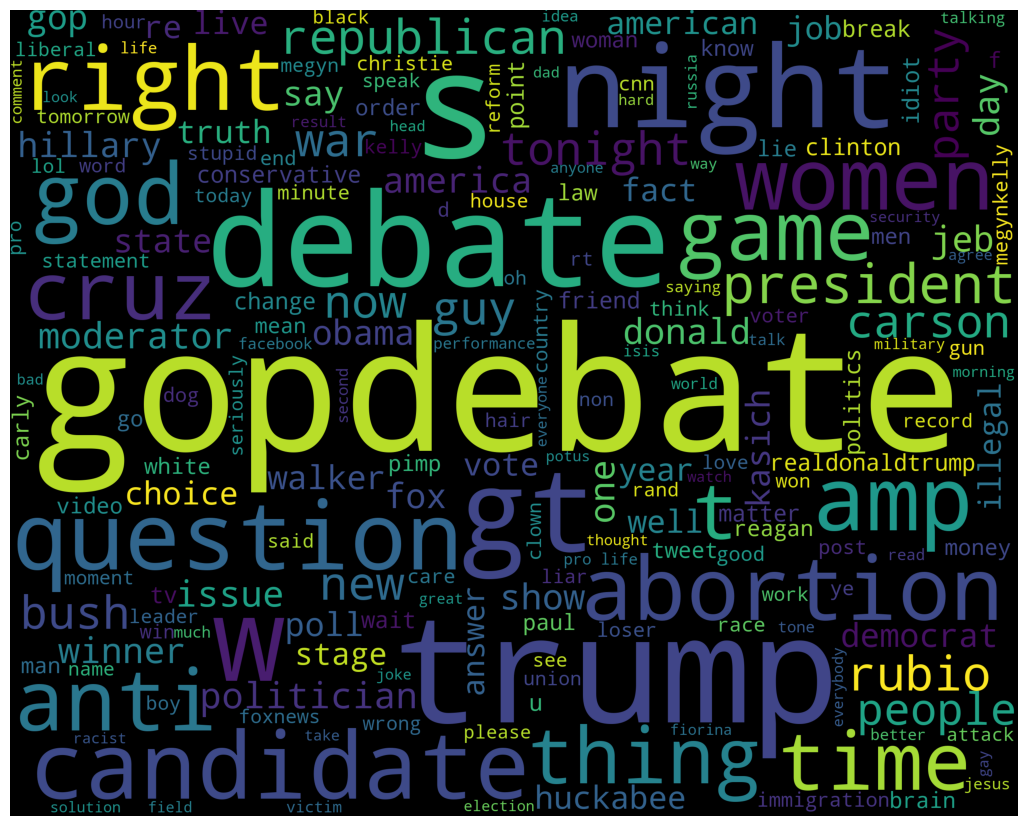

In [20]:
wordcloud_draw(w_features)


Use nltk's NaiveBayes Classifier to extract word features.

In [21]:
training_set = nltk.classify.apply_features(extract_features, tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

Measure how the classifier algorithm scored.

In [24]:
cnt_neg = 0
cnt_pos = 0
cnt_neutral = 0

for obj in test_pos:
    res = classifier.classify(extract_features(obj.split()))
    if (res == 'Positive'):
        cnt_pos = cnt_pos + 1

for obj in test_neutral:
    res = classifier.classify(extract_features(obj.split()))
    if (res == "Neutral"):
        cnt_neutral = cnt_neutral + 1

for obj in test_neg:
    res = classifier.classify(extract_features(obj.split()))
    if (res == "Negative"):
        cnt_neg = cnt_neg + 1

print("[Positive]: %s/%s " % (len(test_pos), cnt_pos))
print("[Neutral]: %s/%s " % (len(test_neutral), cnt_neutral))
print("[Negative]: %s/%s  " % (len(test_neg), cnt_neg))

[Positive]: 234/90 
[Neutral]: 299/71 
[Negative]: 855/754  
